In [90]:
import os
import sys
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### データの読み込み

In [91]:
INPUT_DIR = "../inputs"
train_df = pd.read_csv(os.path.join(INPUT_DIR, "train.csv"))
test_df = pd.read_csv(os.path.join(INPUT_DIR, "test.csv"))
# sample_submit.csvにはカラム名がないのでnames=("id","target")でカラム名をつくってやる
submit_df = pd.read_csv(os.path.join(INPUT_DIR, "sample_submit.csv"),names=("id","target"))

### まずデータの中を見てみる

In [92]:
print("="*20, " train ", "="*20)
display(train_df.head(3))
display(train_df.info())

print("="*20, " test ", "="*20)
display(test_df.head(3))
display(test_df.info())

print("="*20, " sample submission ", "="*20)
display(submit_df.head(3))
display(submit_df.info())

====================  train  ====================


,id,賃料,所在地,アクセス,間取り,築年数,方角,面積,所在階,バス・トイレ,キッチン,放送・通信,室内設備,駐車場,周辺環境,建物構造,契約期間
0,1,75000,東京都北区滝野川３丁目,都営三田線\t西巣鴨駅\t徒歩4分\t\t埼京線\t板橋駅\t徒歩14分\t\t都電荒川線\...,1K,9年9ヶ月,南東,20.01m2,1階／12階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄便座,ガスコンロ／\tコンロ2口／\tシステムキッチン\t／\t給湯,インターネット対応／\tCATV／\tCSアンテナ／\tBSアンテナ,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t室内洗濯機置場／\t敷...,駐輪場\t空有,【小学校】 495m\t【大学】 461m\t【小学校】 962m\t【公園】 1103m\...,RC（鉄筋コンクリート）,2年間
1,2,76000,東京都中央区月島３丁目,都営大江戸線\t勝どき駅\t徒歩5分\t\t有楽町線\t月島駅\t徒歩9分\t\t日比谷線\...,1R,44年10ヶ月,NaN,16.5m2,5階／10階建,専用トイレ／\tシャワー／\t温水洗浄便座,ガスコンロ／\tシステムキッチン\t／\t給湯,インターネット対応,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t室内洗濯機置場／\t敷...,駐輪場\t空有\t駐車場\t無\tバイク置き場\t無,【スーパー】 1283m,鉄骨造,2年間
2,3,110000,東京都渋谷区笹塚２丁目,京王線\t笹塚駅\t徒歩6分\t\t京王線\t代田橋駅\t徒歩7分\t\t京王線\t明大前駅...,1K,8年6ヶ月,南,22.05m2,12階／15階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄...,ガスコンロ／\tコンロ2口／\tシステムキッチン\t／\t給湯,インターネット対応／\t光ファイバー／\tCSアンテナ／\tBSアンテナ,エアコン付\tウォークインクローゼット\tシューズボックス／\tバルコニー／\tフローリング...,"駐輪場\t空有\tバイク置き場\t空有\t駐車場\t近隣\t30,000円(税込)\t距離100m",【スーパー】 89m\t【コンビニ】 184m\t【コンビニ】 392m\t【スーパー】 492m,RC（鉄筋コンクリート）,2年間


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31470 entries, 0 to 31469
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31470 non-null  int64 
 1   賃料      31470 non-null  int64 
 2   所在地     31470 non-null  object
 3   アクセス    31470 non-null  object
 4   間取り     31470 non-null  object
 5   築年数     31470 non-null  object
 6   方角      28721 non-null  object
 7   面積      31470 non-null  object
 8   所在階     31470 non-null  object
 9   バス・トイレ  31141 non-null  object
 10  キッチン    30849 non-null  object
 11  放送・通信   28030 non-null  object
 12  室内設備    31388 non-null  object
 13  駐車場     26183 non-null  object
 14  周辺環境    22038 non-null  object
 15  建物構造    31470 non-null  object
 16  契約期間    24350 non-null  object
dtypes: int64(2), object(15)
memory usage: 4.1+ MB


None

====================  test  ====================


,id,所在地,アクセス,間取り,築年数,方角,面積,所在階,バス・トイレ,キッチン,放送・通信,室内設備,駐車場,周辺環境,建物構造,契約期間
0,31471,東京都世田谷区深沢５丁目1-27,東急大井町線\t等々力駅\t徒歩15分\t\t東急田園都市線\t桜新町駅\t徒歩24分\t\...,2LDK,49年0ヶ月,南,50.22m2,8階／8階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t追焚機能／\t温水洗浄便座／...,ガスコンロ／\tコンロ3口／\tシステムキッチン\t／\t給湯／\tL字キッチン,インターネット対応,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\tエレベーター\t公営水...,駐輪場\t空有\t駐車場\t無\tバイク置き場\t無,【コンビニ】 74m\t【スーパー】 215m\t【病院】 313m\t【小学校】 219m...,鉄骨造,NaN
1,31472,東京都目黒区八雲１丁目11-8,東急東横線\t都立大学駅\t徒歩6分\t\t東急東横線\t自由が丘駅\t徒歩17分\t\t東...,1R,0年2ヶ月,南東,20.88m2,3階／4階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄...,ガスコンロ／\tコンロ2口／\tシステムキッチン\t／\t給湯,インターネット対応／\tCSアンテナ／\tBSアンテナ／\tインターネット使用料無料,エアコン付\tシューズボックス／\tフローリング／\t室内洗濯機置場\t公営水道／\t下水／...,"駐車場\t近隣\t34,000円(税込)\t距離200m\t駐輪場\t無\tバイク置き場\t無",【スーパー】 128m\t【スーパー】 313m\t【コンビニ】 374m\t【コンビニ】 ...,RC（鉄筋コンクリート）,2年間
2,31473,東京都豊島区池袋本町２丁目22-2,東武東上線\t北池袋駅\t徒歩10分\t\t埼京線\t板橋駅\t徒歩16分\t\t山手線\t...,1K,23年4ヶ月,南東,26.93m2,1階／4階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t温水洗浄便座,ガスコンロ／\t給湯,インターネット対応／\t光ファイバー／\tCATV,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t2面採光／\t室内洗濯...,"駐車場\t空有\t5,000円(税込)\t(敷金あり\t1ヶ月)\t駐輪場\t空有\tバイク...",【スーパー】 529m\t【スーパー】 810m\t【コンビニ】 316m\t【コンビニ】 ...,鉄骨造,2年間


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31262 entries, 0 to 31261
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31262 non-null  int64 
 1   所在地     31262 non-null  object
 2   アクセス    31262 non-null  object
 3   間取り     31262 non-null  object
 4   築年数     31262 non-null  object
 5   方角      28454 non-null  object
 6   面積      31262 non-null  object
 7   所在階     31261 non-null  object
 8   バス・トイレ  30942 non-null  object
 9   キッチン    30627 non-null  object
 10  放送・通信   27808 non-null  object
 11  室内設備    31189 non-null  object
 12  駐車場     25906 non-null  object
 13  周辺環境    22021 non-null  object
 14  建物構造    31262 non-null  object
 15  契約期間    24281 non-null  object
dtypes: int64(1), object(15)
memory usage: 3.8+ MB


None

====================  sample submission  ====================


,id,target
0,31471,303875
1,31472,422016
2,31473,275390


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31262 entries, 0 to 31261
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      31262 non-null  int64
 1   target  31262 non-null  int64
dtypes: int64(2)
memory usage: 488.6 KB


None

- 学習に使用できるtrainは約3万件，testも同じぐらい
- 予測対象の賃料以外はobject型（文字列）なので学習に使用できる特徴量にするには前処理が必要

In [93]:
# カラム名が日本語なのは不都合なので英語に変換する
train_df = train_df.rename(
    columns={
        '賃料':'target',
        '契約期間':'Contract', 
        '間取り':'Room', 
        '築年数':'Passed',
        '駐車場':'Parking', 
        '室内設備':'Facility', 
        '放送・通信':'Internet', 
        '周辺環境':'Building', 
        '建物構造':'Material', 
        '面積':'Area', 
        'キッチン':'Kitchen', 
        '所在地':'Place',
        'バス・トイレ':'Bath', 
        '所在階':'Floor', 
        'アクセス':'Access', 
        '方角':'Angle'
    }
)

test_df = test_df.rename(
    columns={
        '契約期間':'Contract', 
        '間取り':'Room', 
        '築年数':'Passed',
        '駐車場':'Parking', 
        '室内設備':'Facility', 
        '放送・通信':'Internet', 
        '周辺環境':'Building', 
        '建物構造':'Material', 
        '面積':'Area', 
        'キッチン':'Kitchen', 
        '所在地':'Place',
        'バス・トイレ':'Bath', 
        '所在階':'Floor', 
        'アクセス':'Access', 
        '方角':'Angle'
    }
)
display(train_df.head(1))

,id,target,Place,Access,Room,Passed,Angle,Area,Floor,Bath,Kitchen,Internet,Facility,Parking,Building,Material,Contract
0,1,75000,東京都北区滝野川３丁目,都営三田線\t西巣鴨駅\t徒歩4分\t\t埼京線\t板橋駅\t徒歩14分\t\t都電荒川線\...,1K,9年9ヶ月,南東,20.01m2,1階／12階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄便座,ガスコンロ／\tコンロ2口／\tシステムキッチン\t／\t給湯,インターネット対応／\tCATV／\tCSアンテナ／\tBSアンテナ,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t室内洗濯機置場／\t敷...,駐輪場\t空有,【小学校】 495m\t【大学】 461m\t【小学校】 962m\t【公園】 1103m\...,RC（鉄筋コンクリート）,2年間


### EDA(Exploratory Data Analysis)
データの詳細を把握するため探索的(Exploratory)にデータを分析する

- 賃料（予測対象）
- 所在地
- アクセス
- 間取り
- 築年数
- 方角
- 面積
- 所在階
- バス・トイレ
- キッチン
- 放送・通信
- 室内設備
- 駐車場
- 周辺環境
- 建物構造
- 契約期間

#### 賃料（target）

In [94]:
# 賃料の統計量をみる
train_df["target"].describe()

count    3.147000e+04
mean     1.182903e+05
std      7.374880e+04
min      2.500000e+04
25%      7.600000e+04
50%      1.020000e+05
75%      1.360000e+05
max      2.500000e+06
Name: target, dtype: float64

- 最安が2万5000円で最高が250万円（高すぎ）
- 中央値が10万ちょいで平均は11万8千円（東京高いな...）

<AxesSubplot:xlabel='target', ylabel='Count'>

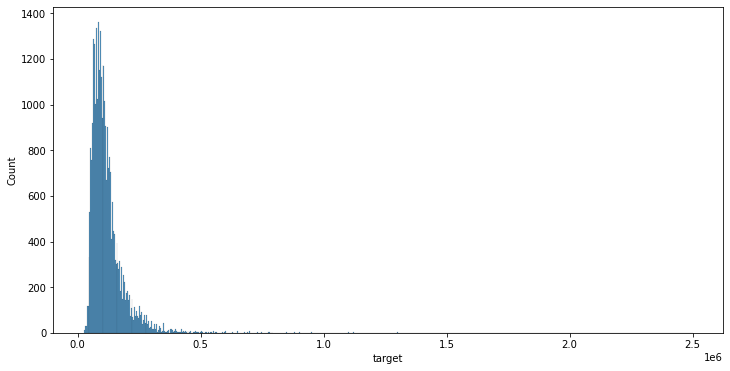

In [95]:
plt.figure(figsize=(12,6))
sns.histplot(train_df["target"])

- 250万に近い物件は流石にほとんどない
- ほとんどが50万円以内におさまっている

In [96]:
train_df["target"].quantile(0.99)

375620.0000000026

trainデータの99%が37万円以内にあることがわかる

250万の賃貸ってどんなもの？

In [97]:
train_df[train_df['target']==2500000]

,id,target,Place,Access,Room,Passed,Angle,Area,Floor,Bath,Kitchen,Internet,Facility,Parking,Building,Material,Contract
5093,5094,2500000,東京都港区三田２丁目4-3,南北線\t麻布十番駅\t徒歩8分\t\t都営大江戸線\t赤羽橋駅\t徒歩9分\t\t山手線\...,2LDK+S(納戸),1年8ヶ月,西,217.29m2,9階／9階建（地下2階）,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t追焚機能／\t浴室乾燥機\t...,IHコンロ\t／\tコンロ3口／\tシステムキッチン\t／\tカウンターキッチン\t／\tL...,インターネット対応,エアコン付／\t床暖房\tウォークインクローゼット\tシューズボックス／\tバルコニー／\t...,"駐車場\t空有(43台)\t48,600円",【飲食店】 959m\t【飲食店】 611m\t【スーパー】 417m\t【スーパー】 65...,RC（鉄筋コンクリート）,3年間\t※この物件は\t定期借家\tです。


- 港区でかなり高そうなのはわかるのでtypoとかではなく正常なデータではありそう

### 所在地(Place)

In [98]:
# trainの同一住所をカウントして上位10件を表示
display(train_df["Place"].value_counts()[:10])
# testの同一住所をカウントして下位10件を表示
display(test_df["Place"].value_counts()[:10])

東京都板橋区板橋３丁目1-8         54
東京都世田谷区太子堂２丁目          53
東京都足立区新田１丁目            47
東京都中野区白鷺２丁目1-21        45
東京都中央区日本橋馬喰町２丁目4-12    44
東京都豊島区池袋３丁目            43
東京都豊島区東池袋２丁目           40
東京都墨田区緑４丁目             39
東京都中央区日本橋馬喰町２丁目        38
東京都中野区江古田３丁目14-3       38
Name: Place, dtype: int64

東京都世田谷区太子堂２丁目       53
東京都板橋区板橋３丁目1-8      48
東京都豊島区南長崎５丁目        47
東京都中野区白鷺２丁目1-21     47
東京都中央区勝どき６丁目        42
東京都中央区日本橋馬喰町２丁目     41
東京都江戸川区鹿骨５丁目        40
東京都板橋区高島平１丁目        40
東京都江東区海辺            39
東京都中野区江古田３丁目14-3    37
Name: Place, dtype: int64

- 東京都，○○区，○○n丁目，a-b（番-号）で区切ることができそう
- 住所から緯度経度を取得して利用できそう

### アクセス（Access）

In [99]:
# train
display(train_df["Access"].value_counts()[:10])
# test
display(test_df["Access"].value_counts()[:10])

都営大江戸線\t新江古田駅\t徒歩10分\t\t西武池袋線\t江古田駅\t徒歩20分\t\t西武新宿線\t沼袋駅\t徒歩15分           65
総武本線\t馬喰町駅\t徒歩4分\t\t都営浅草線\t浅草橋駅\t徒歩4分                                     61
都営三田線\t板橋区役所前駅\t徒歩5分\t\t東武東上線\t下板橋駅\t徒歩7分\t\t都営三田線\t新板橋駅\t徒歩8分            49
東西線\t木場(東京都)駅\t徒歩5分\t\t都営大江戸線\t門前仲町駅\t徒歩15分\t\t京葉線(東京－蘇我)\t越中島駅\t徒歩17分    48
西武新宿線\t鷺ノ宮駅\t徒歩8分\t\t西武新宿線\t都立家政駅\t徒歩14分\t\t西武新宿線\t下井草駅\t徒歩20分            45
総武本線\t馬喰町駅\t徒歩4分\t\t総武線・中央線（各停）\t浅草橋駅\t徒歩4分\t\t都営新宿線\t馬喰横山駅\t徒歩8分         44
都営大江戸線\t勝どき駅\t徒歩5分\t\t有楽町線\t月島駅\t徒歩14分\t\t日比谷線\t築地駅\t徒歩21分                36
有楽町線\t新富町(東京都)駅\t徒歩3分\t\t日比谷線\t八丁堀(東京都)駅\t徒歩4分\t\t日比谷線\t築地駅\t徒歩5分         30
都営新宿線\t住吉(東京都)駅\t徒歩7分\t\t都営新宿線\t西大島駅\t徒歩19分\t\t都営新宿線\t菊川(東京都)駅\t徒歩20分     29
ゆりかもめ\t芝浦ふ頭駅\t徒歩2分\t\t山手線\t田町(東京都)駅\t徒歩15分\t\t都営三田線\t三田(東京都)駅\t徒歩19分      29
Name: Access, dtype: int64

都営大江戸線\t新江古田駅\t徒歩10分\t\t西武池袋線\t江古田駅\t徒歩20分\t\t西武新宿線\t沼袋駅\t徒歩15分           66
西武新宿線\t鷺ノ宮駅\t徒歩8分\t\t西武新宿線\t都立家政駅\t徒歩14分\t\t西武新宿線\t下井草駅\t徒歩20分            47
総武本線\t馬喰町駅\t徒歩4分\t\t都営浅草線\t浅草橋駅\t徒歩4分                                     46
都営大江戸線\t勝どき駅\t徒歩5分\t\t有楽町線\t月島駅\t徒歩14分\t\t日比谷線\t築地駅\t徒歩21分                46
都営三田線\t板橋区役所前駅\t徒歩5分\t\t東武東上線\t下板橋駅\t徒歩7分\t\t都営三田線\t新板橋駅\t徒歩8分            44
東西線\t木場(東京都)駅\t徒歩5分\t\t都営大江戸線\t門前仲町駅\t徒歩15分\t\t京葉線(東京－蘇我)\t越中島駅\t徒歩17分    39
総武本線\t馬喰町駅\t徒歩4分\t\t総武線・中央線（各停）\t浅草橋駅\t徒歩4分\t\t都営新宿線\t馬喰横山駅\t徒歩8分         37
都営大江戸線\t新御徒町駅\t徒歩7分\t\t銀座線\t稲荷町(東京都)駅\t徒歩7分\t\t銀座線\t田原町(東京都)駅\t徒歩8分       29
西武池袋線\t東長崎駅\t徒歩1分\t\t都営大江戸線\t落合南長崎駅\t徒歩9分                                 29
ゆりかもめ\t芝浦ふ頭駅\t徒歩2分\t\t山手線\t田町(東京都)駅\t徒歩15分\t\t都営三田線\t三田(東京都)駅\t徒歩19分      29
Name: Access, dtype: int64

- 最寄駅は複数あって\t\tで区切れそう
- ○○線，○○駅，徒歩n分がひとかたまりでそれぞれ\tで区切れそう

### 間取り（Room）

In [100]:
# train
display(train_df["Room"].value_counts()[:10])
# test
display(test_df["Room"].value_counts()[:10])

1K            11930
1R             5082
1LDK           4823
2LDK           2552
2DK            1909
1DK            1893
3LDK           1124
2K              920
3DK             419
1LDK+S(納戸)      238
Name: Room, dtype: int64

1K            11731
1R             5095
1LDK           4879
2LDK           2579
1DK            1889
2DK            1806
3LDK           1116
2K              887
3DK             432
1LDK+S(納戸)      249
Name: Room, dtype: int64

In [101]:
# 間取りのユニークなもの
print(train_df["Room"].unique())
print("ユニーク数: ", train_df["Room"].unique().shape[0])

['1K' '1R' '2LDK' ... '1LK+S(納戸)' '5DK+S(納戸)' '3K+S(納戸)']
ユニーク数:  30


納戸の有無で賃料の違いはある?

1LDK 4823戸，中央値 150000.0円
1LDK+S(納戸) 238戸，中央値 195000.0円


<AxesSubplot:xlabel='target', ylabel='Probability'>

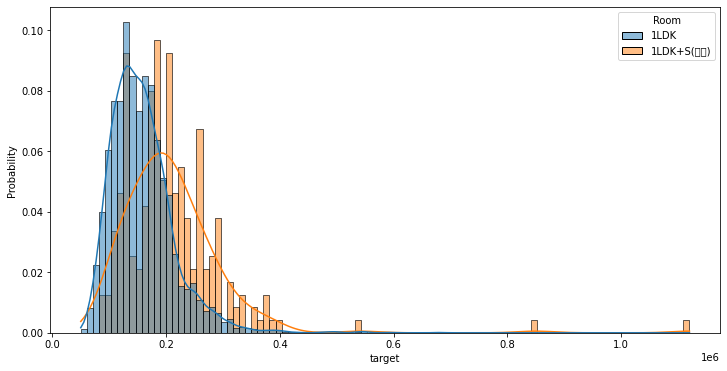

In [102]:
a = '1LDK'
b = '1LDK+S(納戸)'
print(f"{a} {train_df[train_df['Room']==a].shape[0]}戸，中央値 {train_df[train_df['Room']==a]['target'].median()}円")
print(f"{b} {train_df[train_df['Room']==b].shape[0]}戸，中央値 {train_df[train_df['Room']==b]['target'].median()}円")
sample_df = train_df[(train_df["Room"]==a) | (train_df["Room"]==b)]
plt.figure(figsize=(12,6))
sns.histplot(data=sample_df, x="target", hue="Room", bins=100, kde=True, stat="probability", common_norm=False)

- 分布を見たかんじ差はありそう（2クラス間で他の要因が同割合だと仮定したらですが）
- 中央値で4.5万ぐらいの差がある（なるほど，納戸って結構高いんだな...）

### 築年数（Passed）

In [103]:
# train
display(train_df["Passed"].value_counts()[:10])
# test
display(test_df["Passed"].value_counts()[:10])

0年1ヶ月     983
新築        889
0年0ヶ月     704
0年2ヶ月     644
0年3ヶ月     508
0年5ヶ月     484
0年6ヶ月     378
0年4ヶ月     323
12年5ヶ月    262
11年5ヶ月    227
Name: Passed, dtype: int64

0年1ヶ月     902
新築        850
0年0ヶ月     671
0年2ヶ月     629
0年3ヶ月     489
0年5ヶ月     421
0年6ヶ月     406
0年4ヶ月     301
12年5ヶ月    266
11年5ヶ月    243
Name: Passed, dtype: int64

- 基本的にはn年mカ月の表記
- 新築の定義は？
    - 建設工事完了から１年以内で、かつ、人が住んだことのないこと（https://www.zennichi.or.jp/law_faq/%E6%96%B0%E7%AF%89%E4%BD%8F%E5%AE%85%E3%81%AE%E6%84%8F%E5%91%B3/ ）
    - 仮に0年0ヶ月が新築でなければ結構数あるのやばくね？

### 方角（Angle）

In [104]:
# train
display(train_df["Angle"].value_counts())
# test
display(test_df["Angle"].value_counts())

南     8909
東     4995
西     4026
南東    3098
南西    3080
北     1966
北西    1326
北東    1321
Name: Angle, dtype: int64

南     8788
東     4948
西     4061
南東    3052
南西    3042
北     1801
北西    1416
北東    1346
Name: Angle, dtype: int64

- 日当たりが良い南向きが多いのは直感にあう

### 面積（Area）

In [105]:
# train
display(train_df["Area"].value_counts()[:10])
# test
display(test_df["Area"].value_counts()[:10])

20m2       226
40m2       209
18m2       188
21m2       169
30m2       164
25m2       143
16m2       121
22m2       117
15m2       111
19.87m2    110
Name: Area, dtype: int64

20m2       260
18m2       191
25m2       167
21m2       162
40m2       159
30m2       156
16m2       141
25.5m2     129
35m2       126
19.87m2    119
Name: Area, dtype: int64

- m2（平方メートル）をとるだけの楽ちん前処理でよさげ（つまり[:-2]）

実際に面積と賃料の関係をプロットしてみる

In [106]:
sample_df = train_df[["target","Area"]]
# Areaの各値の後ろ2文字m2を除いてfloatに変換してやる
sample_df["Area"] = sample_df["Area"].apply(lambda x: float(x[:-2]))
sample_df

,target,Area
0,75000,20.01
1,76000,16.50
2,110000,22.05
3,150000,60.48
4,74000,39.66
...,...,...
31465,80000,37.90
31466,54500,12.04
31467,125000,60.00
31468,98000,29.59


<AxesSubplot:xlabel='Area', ylabel='target'>

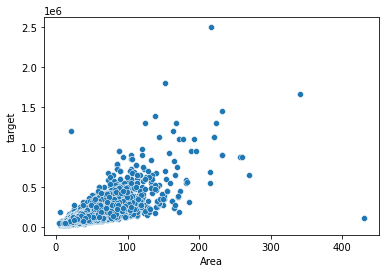

In [107]:
# Areaをx軸，target（賃料）をy軸に指定して散布図でプロット
sns.scatterplot(data=sample_df, x="Area", y="target")

- ちゃんと面積が広い方が賃料が高くなっていることが確認できる
- $400m^2$以上あって賃料10万ぐらいの外れ値を発見できる（さすがにtypoくさい）

### 所在階（Floor）

In [108]:
# train
display(train_df["Floor"].value_counts()[:10])
# test
display(test_df["Floor"].value_counts()[:10])

2階／2階建    2851
1階／2階建    2771
2階／3階建    2017
3階／3階建    1805
1階／3階建    1640
3階／4階建     906
2階／4階建     807
3階／5階建     708
2階／5階建     699
4階／4階建     677
Name: Floor, dtype: int64

2階／2階建    2855
1階／2階建    2748
2階／3階建    2013
3階／3階建    1736
1階／3階建    1685
3階／4階建     833
2階／4階建     812
2階／5階建     677
4階／4階建     673
3階／5階建     665
Name: Floor, dtype: int64

- n階とm階建で区切れそう

### バス・トイレ（Bath）

In [118]:
column = "Bath"
# train
display(train_df[column].value_counts()[:10])
# test
display(test_df[column].value_counts()[:10])

専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t追焚機能／\t浴室乾燥機\t／\t温水洗浄便座／\t洗面台独立／\t脱衣所    4606
専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄便座／\t洗面台独立／\t脱衣所           2936
専用バス／\t専用トイレ／\tシャワー                                                      2133
専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー                                            1495
専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t追焚機能／\t浴室乾燥機\t／\t温水洗浄便座／\t洗面台独立           873
シャワー                                                                      849
専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t洗面台独立／\t脱衣所                               802
バス・トイレ別／\tシャワー／\t追焚機能／\t浴室乾燥機\t／\t温水洗浄便座／\t洗面台独立                          795
専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄便座／\t洗面台独立                  708
バス・トイレ別／\tシャワー                                                            656
Name: Bath, dtype: int64

専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t追焚機能／\t浴室乾燥機\t／\t温水洗浄便座／\t洗面台独立／\t脱衣所    4507
専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄便座／\t洗面台独立／\t脱衣所           2849
専用バス／\t専用トイレ／\tシャワー                                                      1994
専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー                                            1598
専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t追焚機能／\t浴室乾燥機\t／\t温水洗浄便座／\t洗面台独立           887
シャワー                                                                      877
専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t洗面台独立／\t脱衣所                               859
バス・トイレ別／\tシャワー／\t追焚機能／\t浴室乾燥機\t／\t温水洗浄便座／\t洗面台独立                          727
専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄便座／\t洗面台独立                  720
バス・トイレ別／\tシャワー                                                            643
Name: Bath, dtype: int64

- /と\tで区切れそう
- 各設備の有無で特徴量つくるとか？

### Kitchen（キッチン）

In [119]:
column = "Kitchen"
# train
display(train_df[column].value_counts()[:10])
# test
display(test_df[column].value_counts()[:10])

ガスコンロ／\tコンロ2口／\tシステムキッチン\t／\t給湯                  6016
ガスコンロ／\tコンロ2口／\t給湯                               2272
ガスコンロ／\tコンロ3口／\tシステムキッチン\t／\t給湯                  1606
給湯                                               1328
ガスコンロ／\tコンロ2口／\tシステムキッチン\t／\t給湯／\t独立キッチン         1299
ガスコンロ／\tコンロ3口／\tシステムキッチン\t／\tカウンターキッチン\t／\t給湯    1249
ガスコンロ／\t給湯                                        933
ガスコンロ／\tコンロ2口／\tシステムキッチン                          778
IHコンロ\t／\tコンロ2口／\tシステムキッチン\t／\t給湯                 707
ガスコンロ／\tコンロ1口／\t給湯                                624
Name: Kitchen, dtype: int64

ガスコンロ／\tコンロ2口／\tシステムキッチン\t／\t給湯                  5937
ガスコンロ／\tコンロ2口／\t給湯                               2205
ガスコンロ／\tコンロ3口／\tシステムキッチン\t／\t給湯                  1627
給湯                                               1308
ガスコンロ／\tコンロ2口／\tシステムキッチン\t／\t給湯／\t独立キッチン         1263
ガスコンロ／\tコンロ3口／\tシステムキッチン\t／\tカウンターキッチン\t／\t給湯    1259
ガスコンロ／\t給湯                                        952
ガスコンロ／\tコンロ2口／\tシステムキッチン                          776
IHコンロ\t／\tコンロ2口／\tシステムキッチン\t／\t給湯                 711
ガスコンロ／\tコンロ2口／\tシステムキッチン\t／\tカウンターキッチン\t／\t給湯     618
Name: Kitchen, dtype: int64

### 放送・通信（Internet）

室内設備	駐車場	周辺環境	建物構造	契約期間
Facility	Parking	Building	Material	Contract

In [111]:
# train
column = "Internet"
display(train_df[column].value_counts()[:10])
# test
display(test_df[column].value_counts()[:10])

インターネット対応                                      2618
光ファイバー                                         2326
インターネット対応／\t光ファイバー                             1561
光ファイバー／\tCATV                                  1480
インターネット対応／\t光ファイバー／\tCATV／\tCSアンテナ／\tBSアンテナ    1357
インターネット対応／\tCATV                               1226
光ファイバー／\tCATV／\tCSアンテナ／\tBSアンテナ                1212
インターネット対応／\t光ファイバー／\tCSアンテナ／\tBSアンテナ           1005
インターネット対応／\t光ファイバー／\tCATV                       979
CATV                                            979
Name: Internet, dtype: int64

インターネット対応                                      2548
光ファイバー                                         2277
インターネット対応／\t光ファイバー                             1561
インターネット対応／\t光ファイバー／\tCATV／\tCSアンテナ／\tBSアンテナ    1384
光ファイバー／\tCATV                                  1360
インターネット対応／\tCATV                               1247
光ファイバー／\tCATV／\tCSアンテナ／\tBSアンテナ                1182
インターネット対応／\t光ファイバー／\tCSアンテナ／\tBSアンテナ           1036
インターネット対応／\t光ファイバー／\tCATV                      1034
CATV                                            965
Name: Internet, dtype: int64

### 室内設備(Facility)

In [112]:
# train
column = "Facility"
display(train_df[column].value_counts()[:10])
# test
display(test_df[column].value_counts()[:10])

エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t24時間換気システム\t／\t室内洗濯機置場／\t敷地内ごみ置き場\t／\tエレベーター／\tタイル張り\t公営水道／\t下水／\t都市ガス                  1540
エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t室内洗濯機置場／\t敷地内ごみ置き場\t／\tエレベーター／\tタイル張り\t公営水道／\t下水／\t都市ガス                                  811
冷房／\tエアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t24時間換気システム\t／\t室内洗濯機置場／\t敷地内ごみ置き場\t／\tエレベーター／\tタイル張り\t公営水道／\t下水／\t都市ガス              602
エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t24時間換気システム\t／\t2面採光／\t室内洗濯機置場／\t敷地内ごみ置き場\t／\tエレベーター／\tタイル張り\t公営水道／\t下水／\t都市ガス            564
エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t室内洗濯機置場／\t敷地内ごみ置き場\t／\tエレベーター\t公営水道／\t下水／\t都市ガス                                          412
エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t24時間換気システム\t／\t室内洗濯機置場／\t敷地内ごみ置き場\t／\tエレベーター\t公営水道／\t下水／\t都市ガス                           369
エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t室内洗濯機置場\t公営水道／\t下水／\t都市ガス                                                                330
エアコン付\tウォークインクローゼット\tシューズボックス／\tバルコニー／\tフローリング／\t24時間換気システム\t／\t室内洗濯機置場／\t敷地内ごみ置き場\t／\tエレベーター／\tタイル張り\t公

エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t24時間換気システム\t／\t室内洗濯機置場／\t敷地内ごみ置き場\t／\tエレベーター／\tタイル張り\t公営水道／\t下水／\t都市ガス                  1523
エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t室内洗濯機置場／\t敷地内ごみ置き場\t／\tエレベーター／\tタイル張り\t公営水道／\t下水／\t都市ガス                                  798
冷房／\tエアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t24時間換気システム\t／\t室内洗濯機置場／\t敷地内ごみ置き場\t／\tエレベーター／\tタイル張り\t公営水道／\t下水／\t都市ガス              609
エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t24時間換気システム\t／\t2面採光／\t室内洗濯機置場／\t敷地内ごみ置き場\t／\tエレベーター／\tタイル張り\t公営水道／\t下水／\t都市ガス            576
エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t室内洗濯機置場／\t敷地内ごみ置き場\t／\tエレベーター\t公営水道／\t下水／\t都市ガス                                          407
エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t室内洗濯機置場\t公営水道／\t下水／\t都市ガス                                                                366
エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t24時間換気システム\t／\t室内洗濯機置場／\t敷地内ごみ置き場\t／\tエレベーター\t公営水道／\t下水／\t都市ガス                           352
エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t室内洗濯機置場／\t敷地内ごみ置き場\t公営水道／\t下水／\t都市ガス                                 

### 駐車場（Parking）

In [113]:
# train
column = "Parking"
display(train_df[column].value_counts()[:10])
# test
display(test_df[column].value_counts()[:10])

駐車場\t無                                      3269
駐輪場\t空有\t駐車場\t無\tバイク置き場\t無                  2375
駐車場\t無\t駐輪場\t無\tバイク置き場\t無                   1832
駐輪場\t空有                                     1246
駐輪場\t空有\tバイク置き場\t無                           957
駐輪場\t無\tバイク置き場\t無                            941
駐輪場\t空有\tバイク置き場\t空有                          756
駐輪場\t空有\tバイク置き場\t空有\t駐車場\t無                  617
駐輪場\t空有\t0円                                  439
駐車場\t空有\t32,400円(税込)\t駐輪場\t空有\tバイク置き場\t無     139
Name: Parking, dtype: int64

駐車場\t無                                      3123
駐輪場\t空有\t駐車場\t無\tバイク置き場\t無                  2478
駐車場\t無\t駐輪場\t無\tバイク置き場\t無                   1771
駐輪場\t空有                                     1227
駐輪場\t空有\tバイク置き場\t無                           974
駐輪場\t無\tバイク置き場\t無                            973
駐輪場\t空有\tバイク置き場\t空有                          753
駐輪場\t空有\tバイク置き場\t空有\t駐車場\t無                  605
駐輪場\t空有\t0円                                  463
駐車場\t空有\t32,400円(税込)\t駐輪場\t空有\tバイク置き場\t無     139
Name: Parking, dtype: int64

### 周辺環境(Building)

In [114]:
# train
column = "Building"
display(train_df[column].value_counts()[:10])
# test
display(test_df[column].value_counts()[:10])

【スーパー】 264m\t【スーパー】 848m\t【スーパー】 969m\t【コンビニ】 191m\t【コンビニ】 378m                  48
【スーパー】 227m\t【スーパー】 442m\t【スーパー】 422m\t【コンビニ】 260m\t【コンビニ】 320m                  47
【スーパー】 231m\t【スーパー】 309m\t【スーパー】 593m\t【コンビニ】 103m\t【コンビニ】 389m                  44
【スーパー】 292m\t【コンビニ】 341m                                                         40
【スーパー】 501m\t【スーパー】 924m\t【スーパー】 713m\t【コンビニ】 108m\t【コンビニ】 275m\t【コンビニ】 469m     28
【スーパー】 275m\t【スーパー】 478m\t【スーパー】 1118m\t【コンビニ】 140m\t【コンビニ】 153m\t【コンビニ】 375m    25
【スーパー】 702m\t【スーパー】 789m\t【スーパー】 959m\t【コンビニ】 54m\t【コンビニ】 195m                   24
【スーパー】 422m\t【スーパー】 442m\t【スーパー】 686m\t【コンビニ】 398m\t【病院】 612m                    23
【コンビニ】 100m\t【コンビニ】 300m\t【コンビニ】 410m\t【スーパー】 10m\t【幼稚園・保育園】 1800m\t【公園】 330m    23
【スーパー】 346m\t【スーパー】 552m\t【コンビニ】 238m\t【コンビニ】 613m                               22
Name: Building, dtype: int64

【スーパー】 227m\t【スーパー】 442m\t【スーパー】 422m\t【コンビニ】 260m\t【コンビニ】 320m                  42
【スーパー】 264m\t【スーパー】 848m\t【スーパー】 969m\t【コンビニ】 191m\t【コンビニ】 378m                  39
【スーパー】 231m\t【スーパー】 309m\t【スーパー】 593m\t【コンビニ】 103m\t【コンビニ】 389m                  37
【スーパー】 85m\t【スーパー】 138m\t【スーパー】 236m\t【コンビニ】 236m\t【コンビニ】 187m                   28
【スーパー】 501m\t【スーパー】 773m\t【コンビニ】 108m\t【コンビニ】 600m                               26
【スーパー】 275m\t【スーパー】 478m\t【スーパー】 1118m\t【コンビニ】 140m\t【コンビニ】 153m\t【コンビニ】 375m    26
【スーパー】 498m\t【スーパー】 805m\t【スーパー】 923m\t【スーパー】 995m\t【コンビニ】 234m\t【コンビニ】 390m     24
【スーパー】 702m\t【スーパー】 789m\t【スーパー】 959m\t【コンビニ】 54m\t【コンビニ】 195m                   24
【スーパー】 501m\t【スーパー】 924m\t【スーパー】 713m\t【コンビニ】 108m\t【コンビニ】 275m\t【コンビニ】 469m     21
【スーパー】 292m\t【コンビニ】 341m                                                         21
Name: Building, dtype: int64

### 建物構造(Material)

In [115]:
# train
column = "Material"
display(train_df[column].value_counts()[:10])
# test
display(test_df[column].value_counts()[:10])

RC（鉄筋コンクリート）                   17505
木造                              5512
鉄骨造                             3726
SRC（鉄骨鉄筋コンクリート）                 2429
軽量鉄骨                            1812
ALC（軽量気泡コンクリート）                  297
その他                              136
PC（プレキャスト・コンクリート（鉄筋コンクリート））       46
HPC（プレキャスト・コンクリート（重量鉄骨））           4
ブロック                               3
Name: Material, dtype: int64

RC（鉄筋コンクリート）                   17305
木造                              5550
鉄骨造                             3769
SRC（鉄骨鉄筋コンクリート）                 2363
軽量鉄骨                            1796
ALC（軽量気泡コンクリート）                  280
その他                              132
PC（プレキャスト・コンクリート（鉄筋コンクリート））       56
HPC（プレキャスト・コンクリート（重量鉄骨））           6
鉄筋ブロック                             3
Name: Material, dtype: int64

In [116]:
print("Materialのユニーク数 ", train_df[column].unique().shape[0])
print(train_df[column].unique())

Materialのユニーク数  10
['RC（鉄筋コンクリート）' '鉄骨造' '木造' 'SRC（鉄骨鉄筋コンクリート）' '軽量鉄骨' 'ALC（軽量気泡コンクリート）'
 'その他' 'PC（プレキャスト・コンクリート（鉄筋コンクリート））' 'HPC（プレキャスト・コンクリート（重量鉄骨））' 'ブロック']


### 契約期間(Contract)

In [117]:
# train
column = "Contract"
display(train_df[column].value_counts()[:10])
# test
display(test_df[column].value_counts()[:10])

2年間                             22555
2年間\t※この物件は\t定期借家\tです。            931
5年間\t※この物件は\t定期借家\tです。            240
3年間\t※この物件は\t定期借家\tです。            230
1年間                                87
1年間\t※この物件は\t定期借家\tです。             70
4年間\t※この物件は\t定期借家\tです。             62
3年間                                14
2ヶ月間                               11
2022年3月まで\t※この物件は\t定期借家\tです。        9
Name: Contract, dtype: int64

2年間                              22497
2年間\t※この物件は\t定期借家\tです。             957
5年間\t※この物件は\t定期借家\tです。             266
3年間\t※この物件は\t定期借家\tです。             213
1年間\t※この物件は\t定期借家\tです。              76
1年間                                 76
4年間\t※この物件は\t定期借家\tです。              58
3年間                                 12
2021年12月まで\t※この物件は\t定期借家\tです。       11
7年間\t※この物件は\t定期借家\tです。               9
Name: Contract, dtype: int64

- 定期借家だと割安の場合があるらしい(https://www.ur-net.go.jp/chintai/college/201909/000399.html )